In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Conv2D,MaxPooling2D,Input,BatchNormalization,ReLU,Flatten,Dense,UpSampling2D,Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras import backend as K 

# loading the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# scaling data in range from [0,1]

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0
np.max(x_train),np.max(x_test)

(1.0, 1.0)

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

# Spliting data set in 70:30 ratio 

In [6]:
train_X,val_X,train_y,val_y = train_test_split(x_train,y_train, test_size=0.3, random_state=123)
train_X.shape,train_y.shape,val_X.shape,val_y.shape

((42000, 784), (42000,), (18000, 784), (18000,))

# converting labels in onehot format e.g [8]=[0,0,0,0,0,0,0,0,1,0]  labels index from 0 to 9

In [7]:
train_labels = tf.keras.utils.to_categorical(train_y)
val_labels = tf.keras.utils.to_categorical(val_y)
test_labels = tf.keras.utils.to_categorical(y_test)

# MLP model 

In [12]:
model = models.Sequential()
model.add(Dense(128, activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28, 28, 128)       256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 128)       16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
dense_8 (Dense)              (None, 28, 28, 10)        1290      
Total params: 18,058
Trainable params: 18,058
Non-trainable params: 0
_________________________________________________________________


Adam optimizer

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
model.fit(train_X,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/10
329/329 [==============================] - 111s 335ms/step - loss: 0.5813 - accuracy: 0.8166 - val_loss: 0.0759 - val_accuracy: 0.9767
Epoch 2/10
329/329 [==============================] - 107s 325ms/step - loss: 0.1068 - accuracy: 0.9681 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 3/10
329/329 [==============================] - 106s 321ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 4/10
329/329 [==============================] - 105s 320ms/step - loss: 0.0604 - accuracy: 0.9825 - val_loss: 0.0426 - val_accuracy: 0.9875
Epoch 5/10
329/329 [==============================] - 107s 324ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 6/10
329/329 [==============================] - 106s 321ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0386 - val_accuracy: 0.9894
Epoch 7/10
329/329 [==============================] - 106s 321ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0386 -

In [ ]:
loss1_=np.array([0.0759,0.0519,0.0440,0.0426,0.0387,0.0386,0.0386,0.0427,0.0418,0.0386])
avg_crossentropy_loss = np.sum(loss1_)/10
print("avg_crossentropy_loss :",avg_crossentropy_loss)

avg_crossentropy_loss : 0.045340000000000005


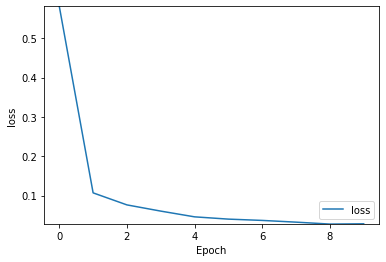

In [ ]:
loss11_=np.array([0.5813,0.1068,0.0762,0.0604,0.0458,0.0400,0.0367,0.0323,0.0274,0.0281])
plt.plot(loss11_, label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0281,0.5813])
plt.legend(loc='lower right')

In [ ]:
cnn_results = model.evaluate(x_test,test_labels)

313/313 [==============================] - 7s 21ms/step - loss: 0.0282 - accuracy: 0.9903


In [ ]:
filepath = '/content/sample_data'
model.save(filepath=filepath)

INFO:tensorflow:Assets written to: /content/sample_data/assets


# learning_rate schedule

SGD with momentum

In [ ]:
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_labels,batch_size=64,epochs=10,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/10
657/657 [==============================] - 96s 144ms/step - loss: 0.5352 - accuracy: 0.8299 - val_loss: 0.0802 - val_accuracy: 0.9749
Epoch 2/10
657/657 [==============================] - 94s 144ms/step - loss: 0.1259 - accuracy: 0.9642 - val_loss: 0.0638 - val_accuracy: 0.9795
Epoch 3/10
657/657 [==============================] - 95s 144ms/step - loss: 0.0951 - accuracy: 0.9720 - val_loss: 0.0594 - val_accuracy: 0.9803
Epoch 4/10
657/657 [==============================] - 95s 144ms/step - loss: 0.0875 - accuracy: 0.9748 - val_loss: 0.0568 - val_accuracy: 0.9817
Epoch 5/10
657/657 [==============================] - 94s 144ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 6/10
657/657 [==============================] - 95s 144ms/step - loss: 0.0742 - accuracy: 0.9786 - val_loss: 0.0521 - val_accuracy: 0.9838
Epoch 7/10
657/657 [==============================] - 94s 143ms/step - loss: 0.0729 - accuracy: 0.9777 - val_loss: 0.0515 - val_ac

In [ ]:
loss_ = history.history['val_loss']
avg_crossentropy_loss = np.sum(loss_)/10
print("avg_crossentropy_loss :",avg_crossentropy_loss)

avg_crossentropy_loss : 0.05684415549039841


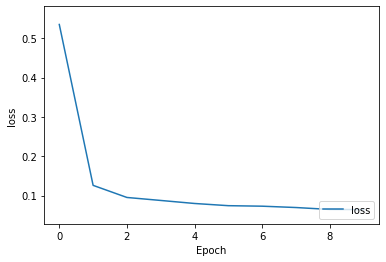

In [ ]:
loss11_=np.array([0.5352,0.1259,0.0951,0.0875,0.0798,0.0742,0.0729,0.0695,0.0646,0.0643])
plt.plot(loss11_, label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0281,0.5813])
plt.legend(loc='lower right')

In [ ]:
cnn_results = model.evaluate(x_test,test_labels)

313/313 [==============================] - 5s 17ms/step - loss: 0.0411 - accuracy: 0.9860


SGD without momentum

In [ ]:
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, decay=decay_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_labels,batch_size=64,epochs=5,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/5
657/657 [==============================] - 109s 165ms/step - loss: 0.3279 - accuracy: 0.9033 - val_loss: 0.1552 - val_accuracy: 0.9531
Epoch 2/5
657/657 [==============================] - 108s 165ms/step - loss: 0.2438 - accuracy: 0.9292 - val_loss: 0.1441 - val_accuracy: 0.9562
Epoch 3/5
657/657 [==============================] - 108s 165ms/step - loss: 0.2273 - accuracy: 0.9346 - val_loss: 0.1388 - val_accuracy: 0.9576
Epoch 4/5
657/657 [==============================] - 108s 165ms/step - loss: 0.2260 - accuracy: 0.9339 - val_loss: 0.1334 - val_accuracy: 0.9584
Epoch 5/5
657/657 [==============================] - 109s 166ms/step - loss: 0.2122 - accuracy: 0.9390 - val_loss: 0.1310 - val_accuracy: 0.9594


In [ ]:
loss_ = history.history['val_loss']
avg_crossentropy_loss = np.sum(loss_)/10
print("avg_crossentropy_loss :",avg_crossentropy_loss)

avg_crossentropy_loss : 0.07025593668222427


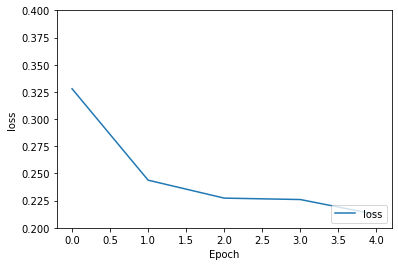

In [ ]:
loss11_=np.array([0.3279,0.2438,0.2273,0.2260,0.2122])
plt.plot(loss11_, label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.2,0.4])
plt.legend(loc='lower right')

In [ ]:
cnn_results = model.evaluate(x_test,test_labels)

313/313 [==============================] - 7s 21ms/step - loss: 0.1237 - accuracy: 0.9636


RMSprop optimizer

In [ ]:
# K.clear_session()
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate / epochs
rms = RMSprop(lr=learning_rate, decay=decay_rate)
model.compile(loss='categorical_crossentropy',optimizer="RMSprop",metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_labels,batch_size=64,epochs=5,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/5
657/657 [==============================] - 109s 164ms/step - loss: 0.4861 - accuracy: 0.8434 - val_loss: 0.0888 - val_accuracy: 0.9742
Epoch 2/5
657/657 [==============================] - 107s 163ms/step - loss: 0.1011 - accuracy: 0.9714 - val_loss: 0.0549 - val_accuracy: 0.9836
Epoch 3/5
657/657 [==============================] - 107s 163ms/step - loss: 0.0779 - accuracy: 0.9773 - val_loss: 0.0489 - val_accuracy: 0.9852
Epoch 4/5
657/657 [==============================] - 107s 163ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0449 - val_accuracy: 0.9857
Epoch 5/5
657/657 [==============================] - 107s 162ms/step - loss: 0.0618 - accuracy: 0.9827 - val_loss: 0.0701 - val_accuracy: 0.9786


In [ ]:
loss_ = history.history['val_loss']
avg_crossentropy_loss = np.sum(loss_)/10
print("avg_crossentropy_loss :",avg_crossentropy_loss)

avg_crossentropy_loss : 0.030753626301884652


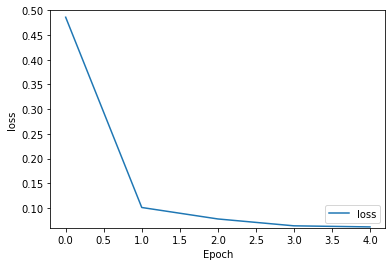

In [ ]:
loss11_=np.array([0.4861,0.1011,0.0779,0.0640,0.0618])
plt.plot(loss11_, label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.06,0.5])
plt.legend(loc='lower right')

In [ ]:
cnn_results = model.evaluate(x_test,test_labels)

313/313 [==============================] - 6s 20ms/step - loss: 0.0661 - accuracy: 0.9804


# Xavier Uniform and Normal Weight Initialization

In [77]:
initializer1 = tf.keras.initializers.GlorotUniform()

In [78]:
model1 = models.Sequential()
model1.add(Dense(128, activation='relu',kernel_initializer=initializer1,input_dim=784))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu',kernel_initializer=initializer1))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu',kernel_initializer=initializer1))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

In [81]:
opt1 = SGD(learning_rate=0.01 , momentum = 0.8)
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

In [82]:
history = model1.fit(train_X,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2915 - accuracy: 0.9334 - val_loss: 0.1998 - val_accuracy: 0.9523
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2269 - accuracy: 0.9413 - val_loss: 0.1939 - val_accuracy: 0.9556
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2171 - accuracy: 0.9422 - val_loss: 0.1870 - val_accuracy: 0.9567
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2170 - accuracy: 0.9425 - val_loss: 0.1788 - val_accuracy: 0.9568
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2006 - accuracy: 0.9464 - val_loss: 0.1753 - val_accuracy: 0.9578
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2029 - accuracy: 0.9462 - val_loss: 0.1714 - val_accuracy: 0.9595
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.1951 - accuracy: 0.9490 - val_loss: 0.1716 - val_accuracy: 0.9598
Epoch 

In [83]:
cnn_results = model1.evaluate(x_test,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9635


In [68]:
initializer1 = tf.keras.initializers.GlorotNormal()

model1 = models.Sequential()
model1.add(Dense(512, activation='relu',kernel_initializer=initializer1,input_dim=784))
model1.add(Dropout(0.2))
model1.add(Dense(512,activation='relu',kernel_initializer=initializer1))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

opt1 = SGD(learning_rate=0.01 , momentum = 0.8)
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

In [69]:
history = model1.fit(train_X,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(val_X, val_labels))

Epoch 1/10
329/329 [==============================] - 6s 17ms/step - loss: 1.1715 - accuracy: 0.6646 - val_loss: 0.3354 - val_accuracy: 0.9008
Epoch 2/10
329/329 [==============================] - 5s 16ms/step - loss: 0.3615 - accuracy: 0.8953 - val_loss: 0.2603 - val_accuracy: 0.9237
Epoch 3/10
329/329 [==============================] - 5s 16ms/step - loss: 0.2792 - accuracy: 0.9206 - val_loss: 0.2165 - val_accuracy: 0.9358
Epoch 4/10
329/329 [==============================] - 5s 16ms/step - loss: 0.2308 - accuracy: 0.9347 - val_loss: 0.1909 - val_accuracy: 0.9424
Epoch 5/10
329/329 [==============================] - 5s 16ms/step - loss: 0.2039 - accuracy: 0.9414 - val_loss: 0.1686 - val_accuracy: 0.9499
Epoch 6/10
329/329 [==============================] - 5s 16ms/step - loss: 0.1800 - accuracy: 0.9471 - val_loss: 0.1523 - val_accuracy: 0.9541
Epoch 7/10
329/329 [==============================] - 5s 16ms/step - loss: 0.1632 - accuracy: 0.9529 - val_loss: 0.1419 - val_accuracy: 0.9562

In [70]:
cnn_results = model1.evaluate(x_test,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9664


# Different Learning Rate and exponential annealing on the learning rate.

## learning rates   0.1,0.01,0.001,0.0001

In [ ]:
learning_rate = 0.01
adm = Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=adm,metrics=['accuracy'])
model.fit(train_X,train_labels,batch_size=64,epochs=2,verbose=1,validation_data=(val_X, val_labels))
model.evaluate(x_test,test_labels)

Epoch 1/2
657/657 [==============================] - 112s 169ms/step - loss: 0.4852 - accuracy: 0.8438 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 2/2
313/313 [==============================] - 7s 21ms/step - loss: 0.0424 - accuracy: 0.9867


[0.04236380010843277, 0.9866999983787537]

In [ ]:
learning_rate = 0.001
adm = Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=adm,metrics=['accuracy'])
model.fit(train_X,train_labels,batch_size=64,epochs=2,verbose=1,validation_data=(val_X, val_labels))
model.evaluate(x_test,test_labels)

Epoch 1/2
657/657 [==============================] - 112s 170ms/step - loss: 0.0904 - accuracy: 0.9744 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 2/2
313/313 [==============================] - 7s 21ms/step - loss: 0.0339 - accuracy: 0.9888


[0.033931002020835876, 0.9887999892234802]

In [ ]:
learning_rate = 0.0001
adm = Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=adm,metrics=['accuracy'])
model.fit(train_X,train_labels,batch_size=64,epochs=2,verbose=1,validation_data=(val_X, val_labels))
model.evaluate(x_test,test_labels)

Epoch 1/2
657/657 [==============================] - 113s 171ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0383 - val_accuracy: 0.9891
Epoch 2/2
313/313 [==============================] - 7s 22ms/step - loss: 0.0328 - accuracy: 0.9891


[0.03281218558549881, 0.9890999794006348]

The amount that the weights are updated during training of a Neural Network is referred to as the step size or the “learning rate.”

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0

In [16]:
def mlp(l_rate) :
  model1 = models.Sequential()
  model1.add(Dense(512, activation='relu',input_dim=784))
  model1.add(Dropout(0.2))
  model1.add(Dense(512,activation='relu'))
  model1.add(Dropout(0.2))
  model1.add(Dense(10,activation='softmax'))

  opt = tf.keras.optimizers.SGD(learning_rate=l_rate , momentum = 0.8)

  model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model1.fit(train_X,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(val_X, val_labels))

  result = model1.evaluate(x_test,test_labels)

  plt.plot(history.history['loss'], label='train data')
  plt.plot(history.history['val_loss'], label='test data')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('\nlearning rate = '+str(l_rate)+"\nLoss : "+str(result[0])+"\nAccuracy : "+str(result[1]) ,pad = -10)

  return model1

Epoch 1/10
329/329 [==============================] - 6s 18ms/step - loss: 0.5895 - accuracy: 0.8144 - val_loss: 0.1767 - val_accuracy: 0.9433
Epoch 2/10
329/329 [==============================] - 6s 17ms/step - loss: 0.1529 - accuracy: 0.9540 - val_loss: 0.1319 - val_accuracy: 0.9591
Epoch 3/10
329/329 [==============================] - 6s 17ms/step - loss: 0.1093 - accuracy: 0.9662 - val_loss: 0.0864 - val_accuracy: 0.9732
Epoch 4/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0763 - accuracy: 0.9757 - val_loss: 0.0878 - val_accuracy: 0.9729
Epoch 5/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 0.0745 - val_accuracy: 0.9774
Epoch 6/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.0749 - val_accuracy: 0.9782
Epoch 7/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 0.0738 - val_accuracy: 0.9784

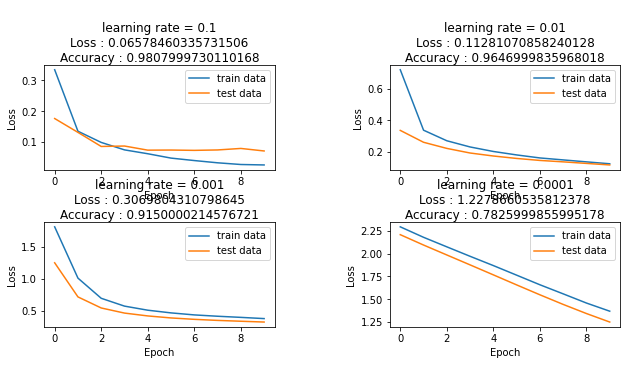

In [17]:
learning_rates = [0.1,0.01,0.001,0.0001]
models_ = []
histories = []
plt.figure(figsize=(10,10))
for i in range(len(learning_rates)) :
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  model = mlp(learning_rates[i])
  models_.append(model)
  plt.subplots_adjust(wspace=0.5)
  plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, hspace=0.5)
plt.show()

as we see that large learning rate give higher accuracy as compared to the lower learning rate

## saving best model and load model

In [22]:
filepath="/content/sample_data"
models_[0].save(filepath=filepath)

INFO:tensorflow:Assets written to: /content/sample_data/assets


In [24]:
best_model = models.load_model(filepath=filepath)
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
